In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. ESTIMATOR 'SCORE' METHOD
# 2. THE 'SCORING' PARAMETER (CROSS VALIDATION)
# 3. PROBLEM SPECIFIC FUNCTIONS

In [4]:
Data=pd.read_csv('Heart_Disease.csv')

In [5]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x=Data.drop('target',axis=1)
y=Data['target']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
RFC=RandomForestClassifier(n_estimators=100)

In [10]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# 1. IN NORMAL TRAIN TEST SPLIT:MODEL IS TRAINED BASED ON TRAINING DATA AND EVALUATED ON TEST DATA
# 2. In K(5) CROSS VALIDATION METHODS: MODEL IS TRAINED OM K(5) DIFFERENT VERSIONS OF TRAINING DATA AND EVALUATED ON K(5) DIFFERENT VERSION OF TEST DATAS

In [12]:
# 1. ESTIMATOR 'SCORE' METHOD
RFC.score(x_test,y_test)

0.8524590163934426

In [13]:
RFC.score(x_train,y_train)

1.0

In [14]:
y_pred=RFC.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
# 2. THE 'SCORING' PARAMETER (CROSS VALIDATION)
from sklearn.model_selection import cross_val_score

In [16]:
np.random.seed(42)
cross_val_score(RFC,x,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [17]:
# SCORING=NONE
np.random.seed(42)
np.mean(cross_val_score(RFC,x,y,cv=5,scoring=None))

0.8248087431693989

In [18]:
# SCORING=ACCURACY
np.random.seed(42)
np.mean(cross_val_score(RFC,x,y,cv=5,scoring='accuracy'))

0.8248087431693989

In [19]:
# SCORING=PRECISION
np.random.seed(42)
np.mean(cross_val_score(RFC,x,y,cv=5,scoring='precision'))

0.8329547346025924

In [20]:
# SCORING=F1 SCORE
np.random.seed(42)
np.mean(cross_val_score(RFC,x,y,cv=5,scoring='f1'))

0.8426854603423346

In [21]:
np.random.seed(42)
RFC.score(x_test,y_test),np.mean(cross_val_score(RFC,x,y,cv=5))

(0.8524590163934426, 0.8248087431693989)

In [22]:
# DEFAULT SCORING PARAMETER OF CLASSIFIER=MEAN ACCURACY(RFC.score())

In [23]:
# CLASSIFICATION MODEL BASED ON EVALUATION METRICS
# A. ACCURACY
# B. AREA UNDER ROC CURVE
# C. CONFUSION MATRIX
# D. CLASSIFICATION REPORT

In [24]:
# A. ACCURACY
np.random.seed(42)
Cross_Validation_Accuracy=cross_val_score(RFC,x,y,cv=5)
print(f'Cross_Validation_Accuracy:{np.mean(Cross_Validation_Accuracy)*100:.2f}%')

Cross_Validation_Accuracy:82.48%


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8524590163934426


In [26]:
# B. AREA UNDER ROC CURVE(TRUE POSITIVE,FALSE POSITIVE,TRUE NEGATIVE,FALSE NEGATIVE)
from sklearn.metrics import roc_curve
y_pred_prob=RFC.predict_proba(x_test)
y_pred_prob[:10]

array([[0.93, 0.07],
       [0.45, 0.55],
       [0.38, 0.62],
       [0.86, 0.14],
       [0.1 , 0.9 ],
       [0.1 , 0.9 ],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.46, 0.54]])

In [27]:
y_pred_positive=y_pred_prob[:,1]
y_pred_positive

array([0.07, 0.55, 0.62, 0.14, 0.9 , 0.9 , 0.7 , 0.03, 0.03, 0.54, 0.77,
       0.27, 0.95, 0.14, 0.97, 0.99, 0.97, 0.11, 0.03, 0.03, 0.41, 0.08,
       0.66, 0.84, 0.64, 0.73, 0.82, 0.75, 0.16, 0.83, 0.07, 0.08, 0.02,
       0.36, 0.58, 0.16, 0.55, 0.82, 0.6 , 0.85, 0.79, 0.74, 0.84, 0.72,
       0.71, 0.22, 0.56, 0.98, 0.15, 0.05, 0.17, 0.15, 0.79, 0.74, 0.18,
       0.05, 0.3 , 0.94, 0.09, 0.  , 0.15])

In [28]:
FPR,TPR,Thresold=roc_curve(y_test,y_pred_positive)

In [29]:
FPR

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.31034483, 0.37931034, 0.48275862,
       0.55172414, 0.62068966, 0.68965517, 0.72413793, 0.79310345,
       0.93103448, 1.        ])

In [30]:
TPR

array([0.     , 0.03125, 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125,
       0.34375, 0.375  , 0.40625, 0.46875, 0.53125, 0.59375, 0.59375,
       0.6875 , 0.6875 , 0.8125 , 0.8125 , 0.84375, 0.9375 , 0.9375 ,
       0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       1.     , 1.     , 1.     , 1.     ])

In [31]:
Thresold

array([1.99, 0.99, 0.98, 0.97, 0.94, 0.9 , 0.85, 0.84, 0.83, 0.82, 0.79,
       0.75, 0.74, 0.73, 0.7 , 0.66, 0.58, 0.56, 0.55, 0.36, 0.3 , 0.27,
       0.17, 0.16, 0.15, 0.14, 0.09, 0.08, 0.07, 0.05, 0.03, 0.  ])

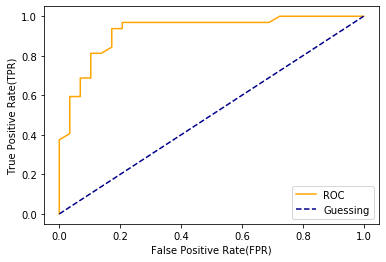

In [32]:
plt.plot(FPR,TPR,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel('True Positive Rate(TPR)')
plt.legend()
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_positive)

0.924030172413793

Text(0, 0.5, 'True Positive Rate(TPR)')

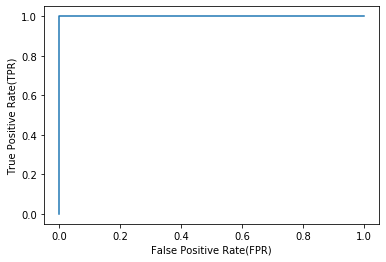

In [34]:
FPR,TPR,Thresold=roc_curve(y_test,y_test)
plt.plot(FPR,TPR,label='ROC CURVE')
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel('True Positive Rate(TPR)')

In [35]:
roc_auc_score(y_test,y_test)

1.0

In [36]:
# C. CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[24  5]
 [ 4 28]]


In [37]:
pd.crosstab(y_test,y_pred,rownames=['Actual Label'],colnames=['Predicted Label'])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [38]:
# D. CLASSIFICATION REPORT
np.random.seed(42)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [47]:
# CLASSIFICATION EVATUATION FUNCTIONS
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'Presion Score:{precision_score(y_test,y_pred)}')
print(f'Recall Score:{recall_score(y_test,y_pred)}')
print(f'F1 Score:{f1_score(y_test,y_pred)}')

Accuracy Score:85.25%
Presion Score:0.8484848484848485
Recall Score:0.875
F1 Score:0.8615384615384615
